In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random 
import seaborn as sns 
from holidays import WEEKEND, HolidayBase
from dateutil.easter import easter
from dateutil.relativedelta import relativedelta as rd
from fbprophet import Prophet

## I have decided to name my data frame as green_gold

**History of the Avocados** : The fruit's popularity sky rocketed, and so the demand for them became incredibly high worldwide. Then it started to attract violent cartels. They saw it as a lucrative business and wanted a piece of the business and have used violence to take over avocado farms for themselves. It is a 1.2 billion pound business in Mexico. They are known to be green gold south of North America. 

In [9]:
green_gold = pd.read_csv('/Users/sophie/Desktop/Avocado_Prices/avocado.csv')

In [53]:
green_gold.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California
8814,0,2018-03-25,1.34,1774776.77,63905.98,908653.71,843.45,801373.63,774634.09,23833.93,2905.61,conventional,2018,NewYork


In [18]:
#sort the data 
green_gold = green_gold.sort_values("Date")

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


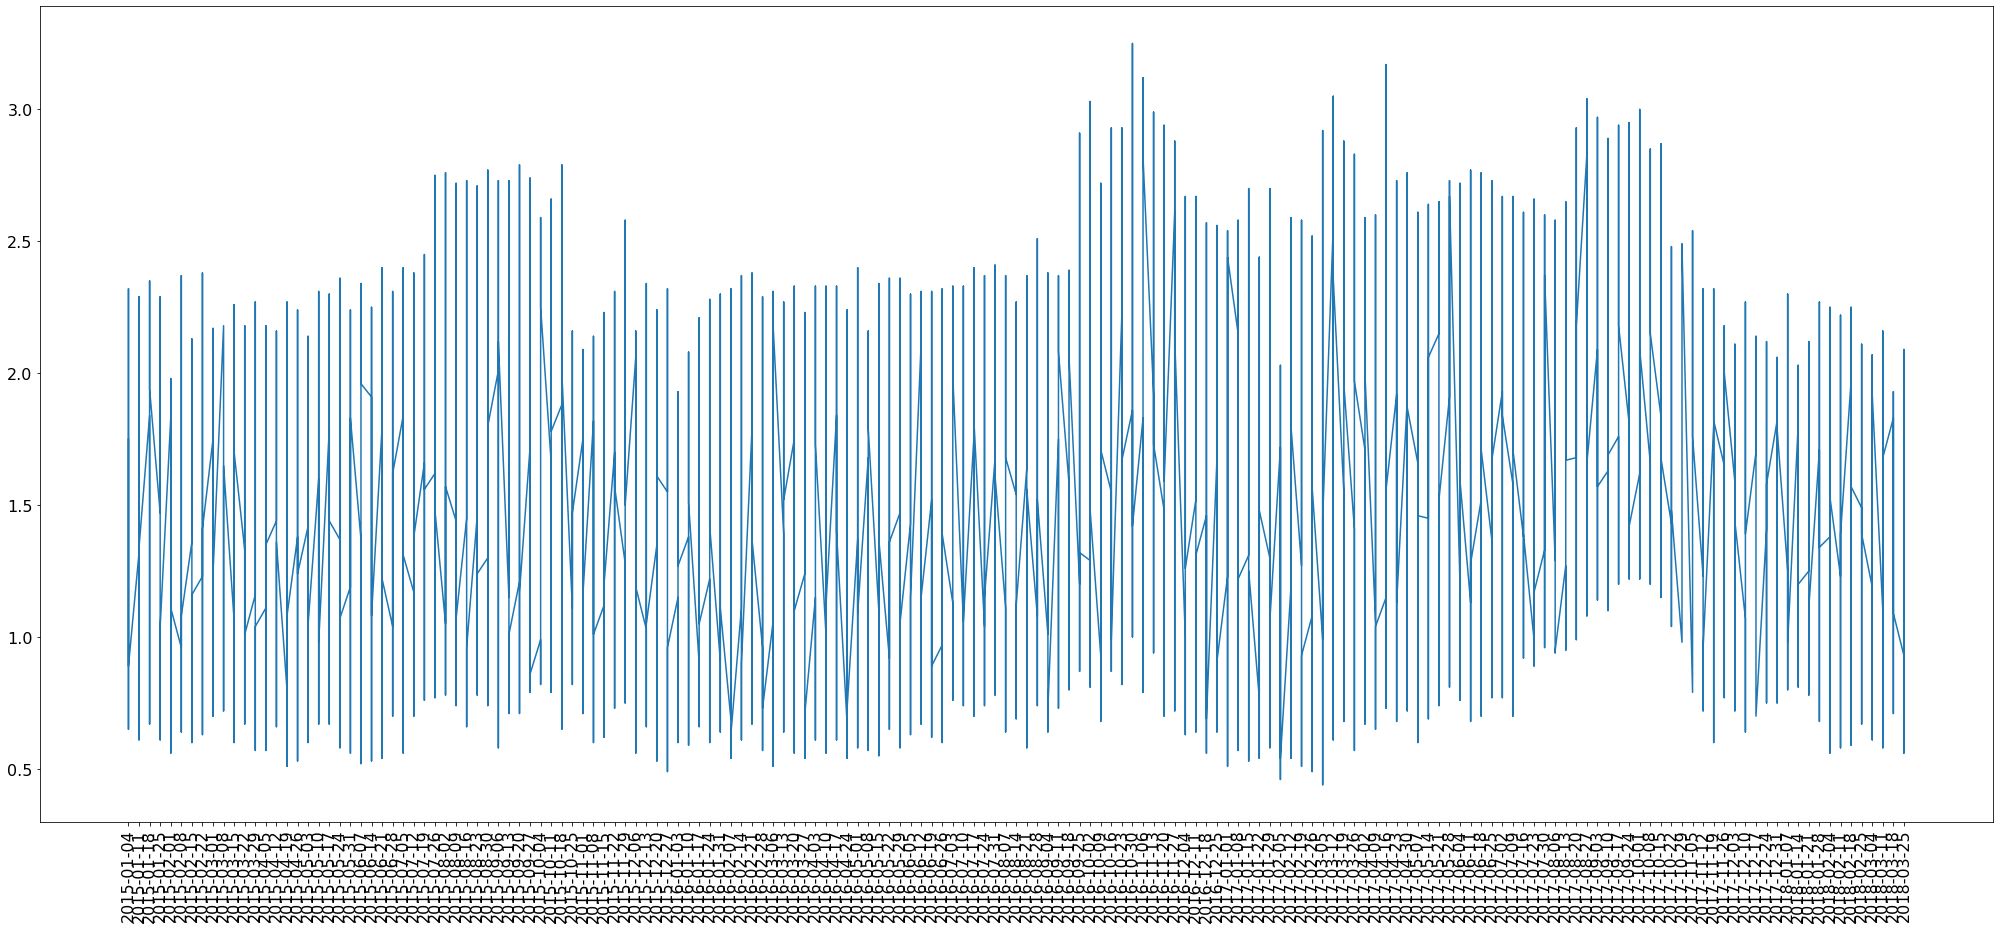

In [44]:
plt.figure(figsize=(35,15))
plt.plot(green_gold['Date'], green_gold['AveragePrice'])
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
fig.autofmt_xdate()

I am very well aware that the date is hard to read, but the point is that it takes place from January of 2015 to the end of March of 2018. This graph shows the average price of avocados in USD over the course of the date mentioned above. For example on Janaury 4th of 2015, the average avocado price is from 70 cents to 2.40 USD. 

## The Amount of Sales per Region 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 <a list of 54 Text xticklabel objects>)

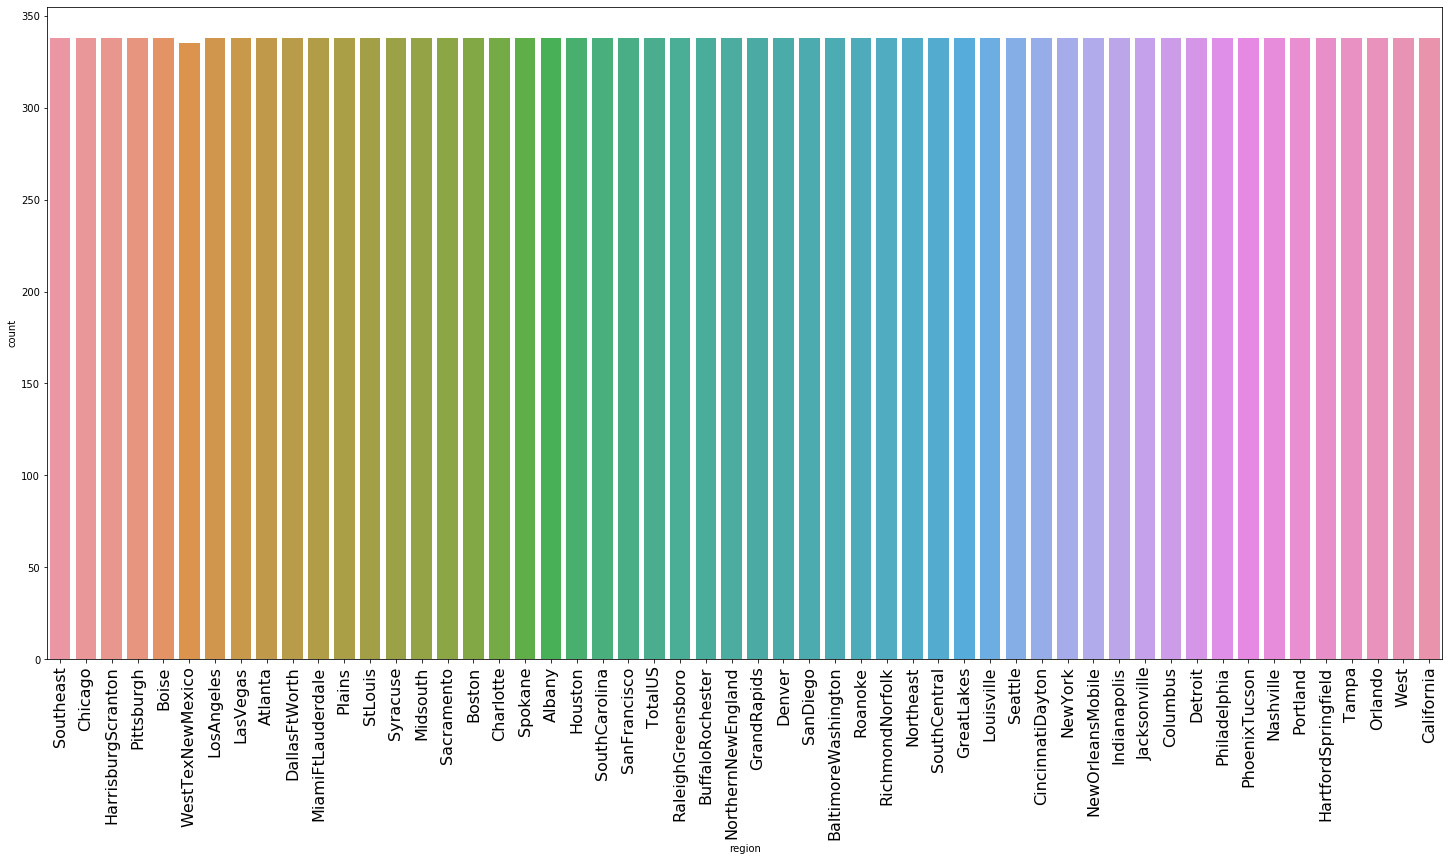

In [52]:
plt.figure(figsize=[25,12])
sns.countplot(x ='region', data = green_gold)
plt.xticks(rotation=90, fontsize=16)

## Amount of Sales to the Year

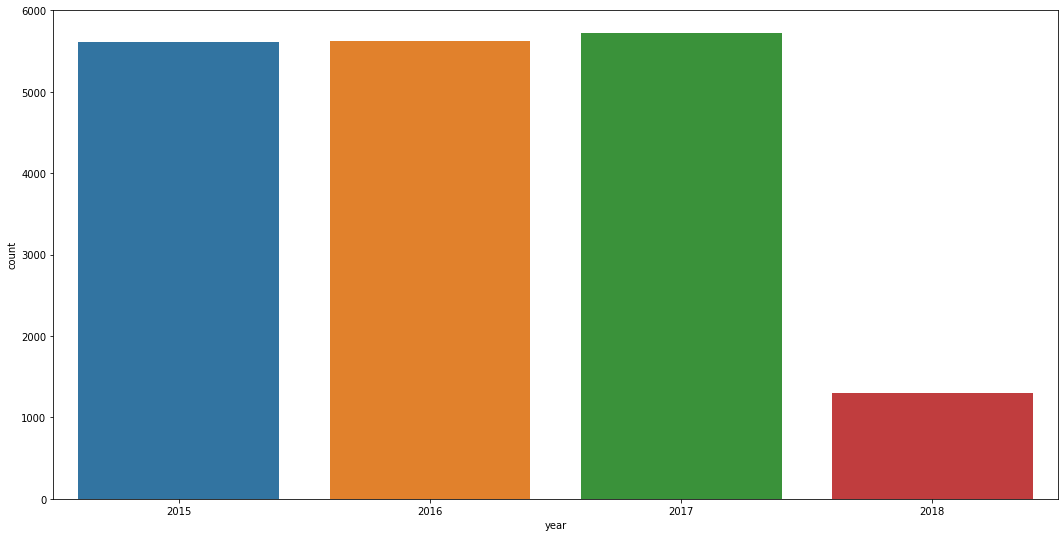

In [57]:
plt.figure(figsize=[18,9])
sns.countplot( x = 'year', data = green_gold)

2018 is not complete. 

### Only need average price of the avocados and the date

In [64]:
green_gold_prophet = green_gold[['Date', 'AveragePrice']]

In [65]:
green_gold_prophet

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


## Make Predictions

In [71]:
# changing the name of the columns 
green_gold_prophet = green_gold_prophet.rename(columns={'Date':'ds', 'AveragePrice':'y'})
green_gold_prophet

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [72]:
# instantiate the object m 
m = Prophet()

In [73]:
m.fit(green_gold_prophet)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.

/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [74]:
#forecast the future 
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

In [76]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498785,0.893168,1.870164,1.498785,1.498785,-0.116951,-0.116951,-0.116951,-0.116951,-0.116951,-0.116951,0.0,0.0,0.0,1.381834
1,2015-01-04,1.498785,0.961951,1.832207,1.498785,1.498785,-0.116951,-0.116951,-0.116951,-0.116951,-0.116951,-0.116951,0.0,0.0,0.0,1.381834
2,2015-01-04,1.498785,0.902203,1.874596,1.498785,1.498785,-0.116951,-0.116951,-0.116951,-0.116951,-0.116951,-0.116951,0.0,0.0,0.0,1.381834
3,2015-01-04,1.498785,0.891552,1.837048,1.498785,1.498785,-0.116951,-0.116951,-0.116951,-0.116951,-0.116951,-0.116951,0.0,0.0,0.0,1.381834
4,2015-01-04,1.498785,0.893025,1.856201,1.498785,1.498785,-0.116951,-0.116951,-0.116951,-0.116951,-0.116951,-0.116951,0.0,0.0,0.0,1.381834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18609,2019-03-21,1.157779,0.543610,1.607137,0.964525,1.343749,-0.085346,-0.085346,-0.085346,-0.085346,-0.085346,-0.085346,0.0,0.0,0.0,1.072433
18610,2019-03-22,1.157034,0.558979,1.587937,0.963157,1.343468,-0.083571,-0.083571,-0.083571,-0.083571,-0.083571,-0.083571,0.0,0.0,0.0,1.073463
18611,2019-03-23,1.156289,0.531605,1.621949,0.961852,1.343187,-0.081520,-0.081520,-0.081520,-0.081520,-0.081520,-0.081520,0.0,0.0,0.0,1.074769
18612,2019-03-24,1.155545,0.573272,1.597705,0.960578,1.342906,-0.079214,-0.079214,-0.079214,-0.079214,-0.079214,-0.079214,0.0,0.0,0.0,1.076330


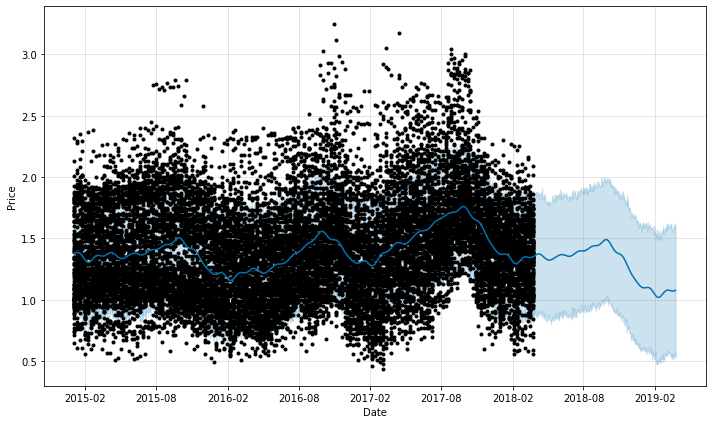

In [77]:
figure = m.plot(forecast, xlabel = 'Date', ylabel ='Price')

/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



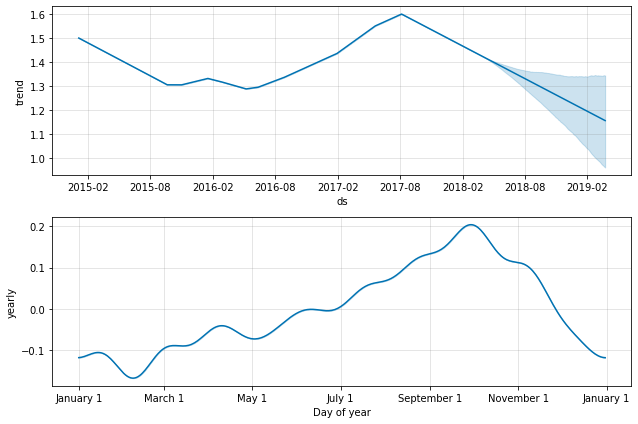

In [78]:
figure = m.plot_components(forecast)

The model predicts between in February 2019, the average price of avocados is approximately 1 USD to 1.35 USD.
The bottom graph is predicting the trend of the avocado prices. 


## Make Prediction Profit for a Specific Region 


In [80]:
green_gold_sample = green_gold[green_gold['region']=='West']

In [81]:
green_gold_sample

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9104,2,2018-03-11,1.00,6906412.50,2442241.76,1695925.97,130983.00,2637261.77,1435608.59,1184730.56,16922.62,conventional,2018,West
18226,1,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West
9103,1,2018-03-18,0.99,7254940.65,2099082.66,1707752.84,115997.93,3332107.22,1333247.05,1982086.02,16774.15,conventional,2018,West
9102,0,2018-03-25,0.93,7667064.46,2567279.74,1912986.38,118289.91,3068508.43,1309580.19,1745630.06,13298.18,conventional,2018,West


In [82]:
# sorting the date 
green_gold_sample = green_gold_sample.sort_values('Date')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


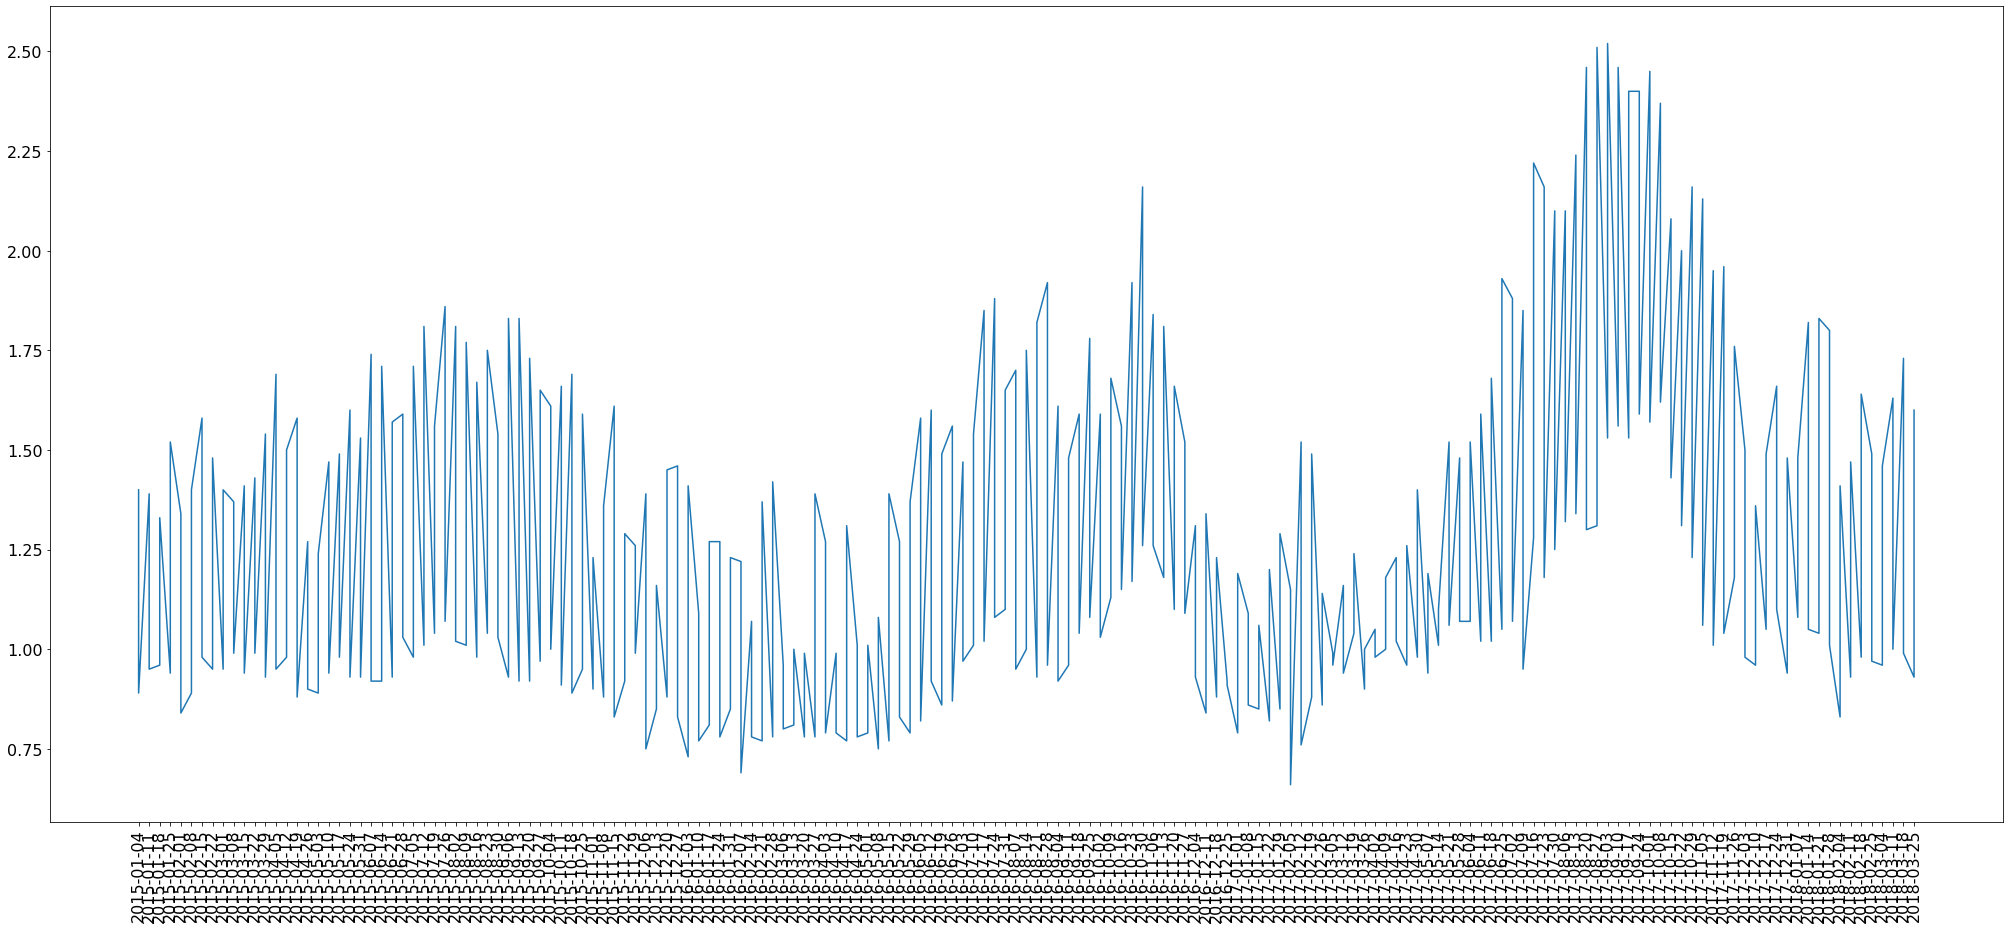

In [85]:
plt.figure(figsize=(35,15))
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.plot(green_gold_sample['Date'], green_gold_sample['AveragePrice'])

In [86]:
green_gold_sample = green_gold_sample.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [87]:
m = Prophet()
m.fit(green_gold_sample)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.

/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [88]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

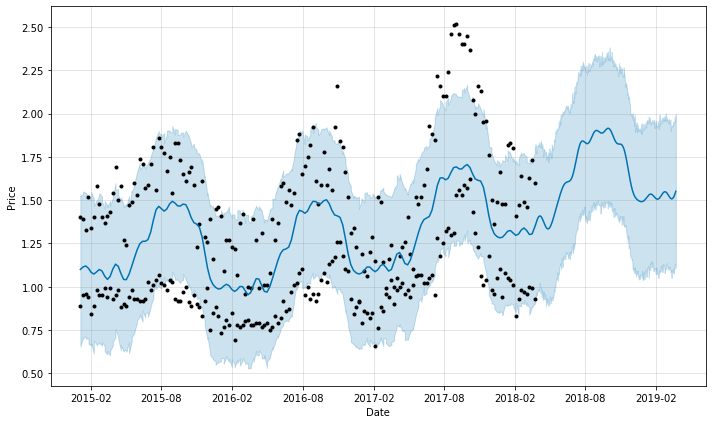

In [89]:
figure = m.plot(forecast, xlabel = 'Date', ylabel ='Price')

/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



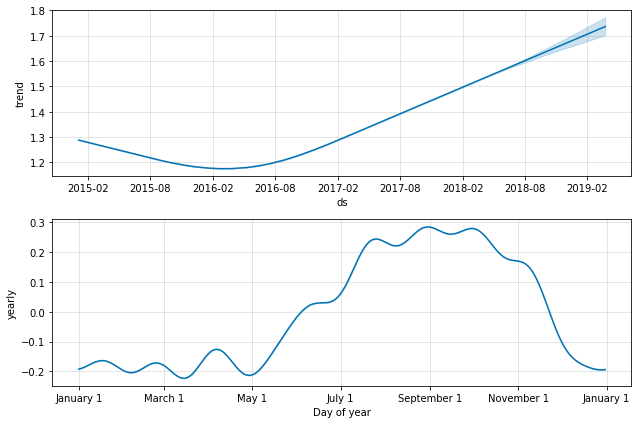

In [90]:
figure = m.plot_components(forecast)

Instead of trying to predict the prices of avocados for the entire country, I just targeted the West side of America.